In [1]:
import logging
logging.basicConfig (
    format = '%(asctime)s [%(levelname)s] %(message)s',
    level = logging.DEBUG
)

from init import *

In [2]:
class Example1UKF (UnscentedKalmanFilter):
    
    def __init__ (self):
        super().__init__()

        # the true state (used in this test)
        self.__true_state = np.matrix([
            [1.1],
            [2.2]
        ], dtype=np.float64)
        
        # initial state estimate
        self.x = np.matrix([
            [-1],
            [1.5]
        ], dtype=np.float64)

        # initial state error matrix
        big = 10
        self.P = np.matrix([
            [big, 0 ],
            [ 0, big]
        ], dtype=np.float64)
        
        super().Init(2,1)
        
        self.monitor = KalmanFilterMonitor(self)

    def GetTrueState (self):
        '''optional, only useful for testing'''
        return self.__true_state
        
    def GetIterationTime (self,iteration):
        return float(iteration)
        
    def GetPredictedMeasurement (self, state, iteration):
        '''override'''
        assert state.shape == (2,1)
        value = state[0,0] + state[1,0]**2 * self.GetIterationTime(iteration)
        return np.matrix([[value]], dtype=np.float64)
        
    def GetMeasurement (self, iteration):
        '''override'''
        sigma = 1
        measurement_error = np.random.default_rng().normal(0,sigma)
        error_matrix = np.matrix([[sigma]], dtype=np.float64)
        measurement_value = self.GetPredictedMeasurement(self.__true_state, iteration) + measurement_error
        return (measurement_value, error_matrix)
    
    def Log (self, iteration, name, value):
        self.monitor.AddData(iteration, name, value)

In [3]:
e = Example1UKF()
e.RunAllIterations(1,100)

In [4]:
import pandas as pd
df = pd.DataFrame(e.monitor._data)
df

,iteration,residual[0],residual.length,state[0],state[1],state_diff[0],state_diff[1],state_diff.length
0,1,5.515054,30.415817,-1.157124,1.028628,-2.257124,-1.171372,6.466722
1,2,6.693996,44.809586,-1.218217,0.735503,-2.318217,-1.464497,7.518881
2,3,2.535227,6.427377,-1.230651,0.666708,-2.330651,-1.533292,7.782919
3,4,1.357599,1.843074,-1.233708,0.638003,-2.333708,-1.561997,7.886028
4,5,0.960831,0.923195,-1.234437,0.620518,-2.334437,-1.579482,7.944360
...,...,...,...,...,...,...,...,...
95,96,-0.390620,0.152584,1.361174,2.198857,0.261174,-0.001143,0.068213
96,97,0.165418,0.027363,1.366600,2.198826,0.266600,-0.001174,0.071077
97,98,0.338720,0.114731,1.377544,2.198765,0.277544,-0.001235,0.077032
98,99,-0.276829,0.076634,1.368731,2.198814,0.268731,-0.001186,0.072218


2023-01-03 20:24:37,409 [DEBUG] matplotlib data path: /home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2023-01-03 20:24:37,413 [DEBUG] CONFIGDIR=/home/zvyagin/.config/matplotlib
2023-01-03 20:24:37,415 [DEBUG] interactive is False
2023-01-03 20:24:37,416 [DEBUG] platform is linux
2023-01-03 20:24:37,468 [DEBUG] CACHEDIR=/home/zvyagin/.cache/matplotlib
2023-01-03 20:24:37,472 [DEBUG] Using fontManager instance from /home/zvyagin/.cache/matplotlib/fontlist-v330.json
2023-01-03 20:24:37,674 [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-03 20:24:37,676 [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-03 20:24:37,678 [DEBUG] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-01-03 20:24:37,679 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', n

2023-01-03 20:24:37,699 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,700 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,700 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 20:24:37,701 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STI

2023-01-03 20:24:37,736 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman8-italic.otf', name='Latin Modern Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 20:24:37,736 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSans-Eight.otf', name='Fira Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
2023-01-03 20:24:37,737 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/roboto-slab/RobotoSlab-Bold.ttf', name='Roboto Slab', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 20:24:37,738 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/firasanscompressed-regular.otf', name='Fira Sans Compressed', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,738 [DEBUG] findfont: sc

2023-01-03 20:24:37,752 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsansquot8-regular.otf', name='Latin Modern Sans Quotation', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,753 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf', name='Ubuntu', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-01-03 20:24:37,753 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsans8-regular.otf', name='Latin Modern Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,754 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman5-bold.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 20:24:37,754 [DEBUG] 

2023-01-03 20:24:37,775 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmromanslant12-regular.otf', name='Latin Modern Roman Slanted', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,776 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-ExtraBold.otf', name='Fira Sans Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
2023-01-03 20:24:37,776 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrepagella-regular.otf', name='TeX Gyre Pagella', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,777 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-HairItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=100, stretch='cond

2023-01-03 20:24:37,791 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsansdemicond10-regular.otf', name='Latin Modern Sans Demi Cond', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
2023-01-03 20:24:37,792 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrebonum-regular.otf', name='TeX Gyre Bonum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,792 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-ExtraLightItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=250, stretch='condensed', size='scalable')) = 11.3925
2023-01-03 20:24:37,792 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman10-bold.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=700, stretch='normal', s

2023-01-03 20:24:37,813 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstArt.ttf', name='KacstArt', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-01-03 20:24:37,814 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSans-HairItalic.otf', name='Fira Sans', style='italic', variant='normal', weight=100, stretch='normal', size='scalable')) = 11.335
2023-01-03 20:24:37,814 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSerif-Italic.ttf', name='Liberation Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 20:24:37,815 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmmonoproplt10-regular.otf', name='Latin Modern Mono Prop Light', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,816 [DEBUG] findfon

2023-01-03 20:24:37,833 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 20:24:37,834 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-BoldItalic.otf', name='Nimbus Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 20:24:37,835 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Jet.ttf', name='Jet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,835 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/open-sans/OpenSans-CondLight.ttf', name='Open Sans', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
2023-01-03 20:24:37,836 [DEBUG] findfont: score(FontE

2023-01-03 20:24:37,856 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Nagham.ttf', name='Nagham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,856 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-Hair.otf', name='Fira Sans Condensed', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
2023-01-03 20:24:37,857 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2023-01-03 20:24:37,857 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', name='Liberation Mono', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 20:24:37,858 [DEBUG] 

2023-01-03 20:24:37,877 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmmono12-regular.otf', name='Latin Modern Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,877 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 20:24:37,878 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Mashq.ttf', name='Mashq', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,878 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeMonoOblique.ttf', name='FreeMono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 20:24:37,879 [DEBUG] findfont: score(F

2023-01-03 20:24:37,903 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf', name='URW Bookman', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2023-01-03 20:24:37,904 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Furat.ttf', name='Furat', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,905 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf', name='Ubuntu', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 20:24:37,906 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Nice.ttf', name='Nice', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,906 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/open-

2023-01-03 20:24:37,939 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_AlArabiya.ttf', name='AlArabiya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,940 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeMonoBoldOblique.ttf', name='FreeMono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 20:24:37,940 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-Bold.otf', name='C059', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 20:24:37,941 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrecursor-regular.otf', name='TeX Gyre Cursor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:37,942 [DEBUG] findfont: score(FontEnt

2023-01-03 20:24:37,964 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCompressed-SemiBoldItalic.otf', name='Fira Sans Compressed', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
2023-01-03 20:24:37,965 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-UltraItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=950, stretch='condensed', size='scalable')) = 11.772499999999999
2023-01-03 20:24:37,966 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWGothic-BookOblique.otf', name='URW Gothic', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 20:24:37,967 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrecursor-bold.otf', name='TeX Gyre Cursor', style='normal', variant='normal', weight=700, stretch='normal', size='scalabl

2023-01-03 20:24:38,009 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Hor.ttf', name='Hor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:38,009 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Dimnah.ttf', name='Dimnah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:38,010 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Granada.ttf', name='Granada', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 20:24:38,011 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf', name='Ubuntu', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 20:24:38,011 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVu

<AxesSubplot: xlabel='iteration'>

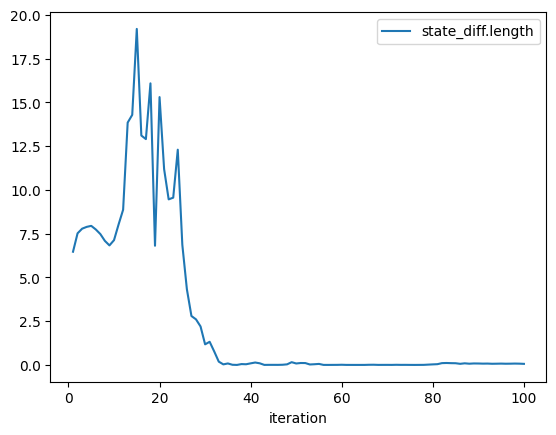

In [5]:
df.plot(x='iteration', y='state_diff.length')

<AxesSubplot: xlabel='iteration'>

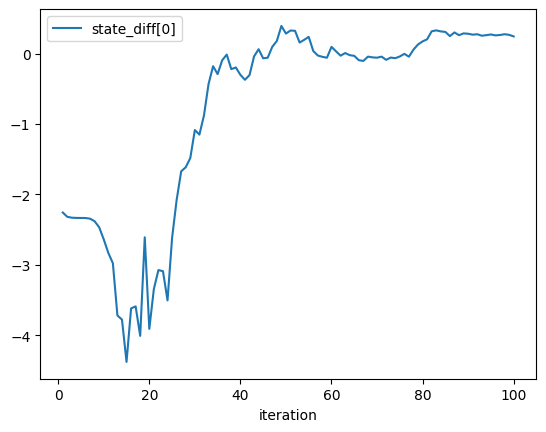

In [6]:
df.plot(x='iteration', y='state_diff[0]')

<AxesSubplot: xlabel='iteration'>

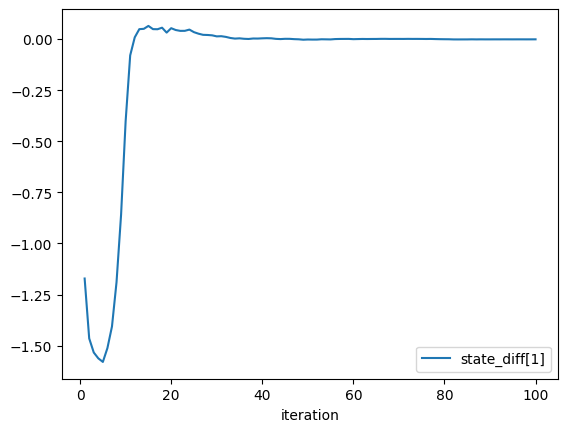

In [7]:
df.plot(x='iteration', y='state_diff[1]')

<AxesSubplot: xlabel='iteration'>

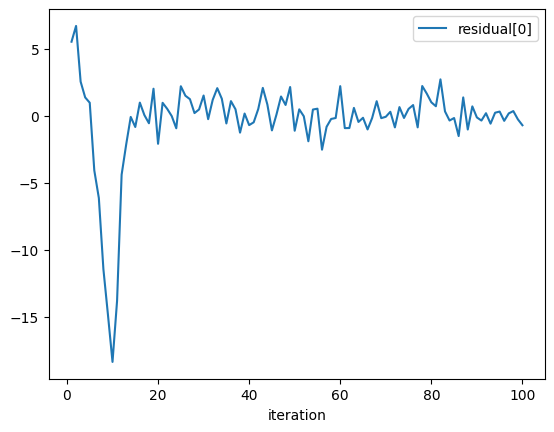

In [8]:
df.plot(x='iteration', y='residual[0]')